# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Indonesia Di Tahun 2020

## 1. Import Library & Load Dataset Dari Local Device

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_2020 = pd.read_excel("Data Tahun 2020.xlsx")
data_2020.head()

,date,content,label
0,2020-12-29 23:16:16+00:00,@BieSpartacus @Da_yangqu @aniesbaswedan Owh ka...,positif
1,2020-12-29 07:49:59+00:00,"Beda pk anies, dengan pejabat publik lainnya, ...",negatif
2,2020-12-28 14:52:49+00:00,@PeriSyantik @MerryAnjani19 @CNNIndonesia Situ...,positif
3,2020-12-28 07:19:18+00:00,@OposisiCerdas Pokoknya klo pak anies jd calon...,negatif
4,2020-12-27 16:42:18+00:00,@detikcom Mnding mikir buat 2022 dulu Bang. 20...,negatif


In [3]:
# Mengecek tipe data dan juga apakah di dalam DataFrame "data_2020" memiliki nilai NaN/tidak
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1800 non-null   object
 1   content  1800 non-null   object
 2   label    1800 non-null   object
dtypes: object(3)
memory usage: 42.3+ KB


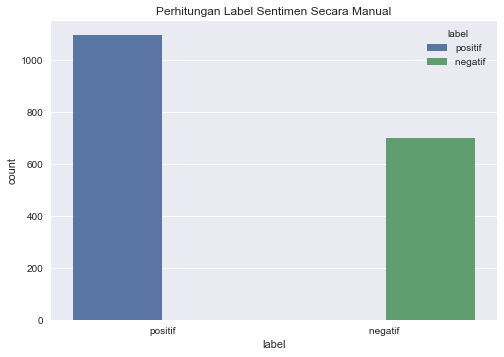

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "label"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="label", hue="label", data=data_2020)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jumlah_content = data_2020.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jumlah_content.style.background_gradient(cmap="Wistia")

,label,content
1,positif,1098
0,negatif,702


Dapat dilihat dari perhitungan diatas, dari 1800 jumlah data netizen twitter di tahun 2020 ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 1098 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 702.

## 2. Text Preprocessing (Cleansing, Case Folding, Tokenizing, Stopwords & Stemming)

### Cleansing

In [6]:
# Menghilangkan dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian pada kolom content
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data_2020["content"] = data_2020["content"].apply(bersih_text)

data_2020.head()

,date,content,label
0,2020-12-29 23:16:16+00:00,BieSpartacus Da yangqu aniesbaswedan Owh kalo...,positif
1,2020-12-29 07:49:59+00:00,Beda anies dengan pejabat publik lainnya pak a...,negatif
2,2020-12-28 14:52:49+00:00,PeriSyantik MerryAnjani19 CNNIndonesia Situ b...,positif
3,2020-12-28 07:19:18+00:00,OposisiCerdas Pokoknya klo pak anies calon pr...,negatif
4,2020-12-27 16:42:18+00:00,detikcom Mnding mikir buat 2022 dulu Bang 202...,negatif


In [7]:
# Menghapus spasi pada kolom "label"
data_2020.label = list(map(lambda x: x.strip(), data_2020.label))
data_2020.head()

,date,content,label
0,2020-12-29 23:16:16+00:00,BieSpartacus Da yangqu aniesbaswedan Owh kalo...,positif
1,2020-12-29 07:49:59+00:00,Beda anies dengan pejabat publik lainnya pak a...,negatif
2,2020-12-28 14:52:49+00:00,PeriSyantik MerryAnjani19 CNNIndonesia Situ b...,positif
3,2020-12-28 07:19:18+00:00,OposisiCerdas Pokoknya klo pak anies calon pr...,negatif
4,2020-12-27 16:42:18+00:00,detikcom Mnding mikir buat 2022 dulu Bang 202...,negatif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil.

### Case Folding

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data_2020["content"] = data_2020["content"].str.lower()

data_2020.head()

,date,content,label
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data_2020["content_tokenizing"] = data_2020["content"].apply(tokennization)
data_2020.head()

,date,content,label,content_tokenizing
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif,"[biespartacus, da, yangqu, aniesbaswedan, owh,..."
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif,"[beda, anies, dengan, pejabat, publik, lainnya..."
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif,"[perisyantik, merryanjani19, cnnindonesia, sit..."
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif,"[oposisicerdas, pokoknya, klo, pak, anies, cal..."
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif,"[detikcom, mnding, mikir, buat, 2022, dulu, ba..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
# Proses Filtering dari kolom "content_tokenizing"
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", "seraya", "seterusnya", 
               "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "nggak", "mari", "nanti", "melainkan", "oh", "ok",
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap", "apakah", "kecuali", "sebab", "selain"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data_2020["content_stopwords"] = data_2020["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data_2020["content_stopwords"] = data_2020["content_stopwords"].apply(stopwords_removal)
data_2020.head()

,date,content,label,content_tokenizing,content_stopwords
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif,"[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,..."
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif,"[beda, anies, dengan, pejabat, publik, lainnya...","[beda, anies, pejabat, publik, anies, kerja, b..."
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif,"[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit..."
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif,"[oposisicerdas, pokoknya, klo, pak, anies, cal...","[oposisicerdas, pokoknya, klo, anies, calon, p..."
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif,"[detikcom, mnding, mikir, buat, 2022, dulu, ba...","[detikcom, mnding, mikir, 2022, bang, 2022, aj..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_stopwords"
for document in data_2020["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data_2020["content_stemming"] = data_2020["content_stopwords"].swifter.apply(stemming_word)

8609
------------------------
biespartacus : biespartacus
da : da
yangqu : yangqu
aniesbaswedan : aniesbaswedan
owh : owh
kalo : kalo
anies : anies
kerja : kerja
risma : risma
pencitraan : citra
bego : bego
bie : bie
bilangin : bilangin
beda : beda
pejabat : jabat
publik : publik
beritanya : berita
kerjanya : kerja
pemanis : man
ginihari : ginihari
begoin : begoin
rakyat : rakyat
aja : aja
dgn : dgn
pemberitaan : berita
dosa : dosa
tau : tau
v2lghm9pdx : v2lghm9pdx
perisyantik : perisyantik
merryanjani19 : merryanjani19
cnnindonesia : cnnindonesia
situ : situ
beneran : beneran
modal : modal
adu : adu
argumentasi : argumentasi
coba : coba
meme : meme
ginian : ginian
latihan : latih
deh : deh
pembina : bina
bikin : bikin
malu : malu
disuruh : suruh
suruh : suruh
saingan : saing
sdh : sdh
repot2 : repot2
diangkat : angkat
mensos : mensos
downgrade : downgrade
pndukung : pndukung
bgini : bgini
mentri : tri
oposisicerdas : oposisicerdas
pokoknya : pokok
klo : klo
calon : calon
presiden : pr

namenye : namenye
jangan2 : jangan2
sadar : sadar
goodbener : goodbener
c19 : c19
makasih : makasih
mudinarl : mudinarl
purba : purba
desmo : desmo
prabowo : prabowo
larinya : lari
bahas : bahas
kelompok : kelompok
provokator : provokator
wajar : wajar
sih : sih
natural : natural
klau : klau
deni : den
mantaap : mantaap
bilang : bilang
pdip : pdip
loyo : loyo
kbyakan : kbyakan
kbijakan : kbijakan
membeoo : membeoo
imadya : imadya
ttg : ttg
formula : formula
kritisx : kritisx
andotulong : andotulong
kamalbukankemal : kamalbukankemal
intoleransi : intoleransi
bani : bani
togog : togog
penasaran : penasaran
comberan : comberan
keok : keok
jualan : jual
ayat : ayat
mayat : mayat
cuman : cuman
sulut : sulut
ntt : ntt
gubernurnya : gubernur
muslim : muslim
nyinyir : nyinyir
kayak : kayak
ulitrisnani : ulitrisnani
psi : psi
julidin : julidin
nyinyirin : nyinyirin
berhasil : hasil
julid : julid
kliatan : kliatan
andy : andy
budiman : budiman
seputar : putar
pengikutnya : ikut
matian : mati
men

baretanovri : baretanovri
detahida : detahida
anistrianaanis : anistrianaanis
jimlyas : jimlyas
gabung : gabung
anaklolina2 : anaklolina2
galih : galih
akek : akek
nyamain : nyamain
sejajarin : sejajarin
awam : awam
sayang : sayang
kadang : kadang
gelar : gelar
bbmrachel : bbmrachel
bisma : bisma
haryana : haryana
dalang : dalang
demonya : demo
ditangkepin : ditangkepin
gituloh : gituloh
jumhur : jumhur
dll : dll
kerumunan : kerumun
nikahan : nikah
dalangnya : dalang
rijiek : rijiek
pembiaran : biar
masak : masak
ribuan : ribu
dipanggilin : dipanggilin
satu2 : satu2
abisin : abisin
penyidiknya : sidik
mayoritas : mayoritas
bsinuhajie : bsinuhajie
boecharikarim : boecharikarim
spt : spt
kenyang : kenyang
laper : laper
ngamuk : ngamuk
liat : liat
wkt : wkt
jaman : jaman
ngamukan : ngamukan
anteng : anteng
pade : pade
moh : moh
effendie : effendie
fahrihamzah : fahrihamzah
lha : lha
knpa : knpa
pesawat : pesawat
wilayah : wilayah
ngizinin : ngizinin
kuasa : kuasa
mencegah : cegah
isinya :

ir4lolb1jc : ir4lolb1jc
pekok : kok
bahlul : bahlul
pendemo : demo
bayaran : bayar
nyuruh : nyuruh
cukong : cukong
lengser : lengser
tentram : tentram
ape : ape
loo : loo
jcolzcgbda : jcolzcgbda
ituudh : ituudh
zyezykia : zyezykia
hahahahha : hahahahha
bajer : bajer
gocengan : gocengan
langsung : langsung
tante : tante
keknya : kek
ketakutan : takut
video : video
beredar : edar
sendirilah : sendiri
kesian : kesi
sembarangan : sembarang
nuding : nuding
salah : salah
main : main
fljm7ytkg8 : fljm7ytkg8
swaswa : swaswa
nyari : nyari
beruang : beruang
ragunan : ragunan
ilang : ilang
koko : koko
kru : kru
fkadrun : fkadrun
kab : kab
bekasi : bekas
merugikan : rugi
bocil : bocil
triajaaa : triajaaa
mudeng : mudeng
faktanya : fakta
halte : halte
bunderan : bunderan
renovasi : renovasi
pasca : pasca
bombastis : bombastis
65milyard : 65milyard
blom : blom
penjelasan : jelas
transparansinya : transparansi
sigmahalim : sigmahalim
jancuk : jancuk
asu : asu
koen : koen
iku : iku
ancene : ancene
aku

hilmi28 : hilmi28
wow : wow
gaada : gaada
haha : haha
yaaa : yaaa
sehat : sehat
tuhan : tuhan
berpikir : pikir
johanslo1 : johanslo1
anggota : anggota
dewan : dewan
pdipeh : pdipeh
dianggap : anggap
pamer : pamer
andil : andil
regar : regar
oposisi : oposisi
kafir : kafir
kemarahan : marah
allah : allah
teguran : tegur
salahkan : salah
dibenci : benci
bandang : bandang
adibabahira : adibabahira
kakekhalal : kakekhalal
analisa : analisa
adl : adl
asumsi : asumsi
bhw : bhw
beralih : alih
pikirnya : pikir
gobloknya : goblok
bersih : bersih
irisan : iris
ideologis : ideologis
hendryx691 : hendryx691
maspiyu4 : maspiyu4
lingkaran : lingkar
menolak : tolak
mnjadi : mnjadi
jujur : jujur
resikonya : resiko
hrus : hrus
dikeluarkan : keluar
ngiri : ngiri
kangsemproel : kangsemproel
terselubung : selubung
habisi : habis
next : next
model : model
dieksalsa : dieksalsa
risyadfardy : risyadfardy
fuhrer : fuhrer
e100ss : e100ss
gelandangan : gelandang
provinsi : provinsi
khofifah : khofifah
luntang :

zoelfick : zoelfick
mna : mna
dtanjung15 : dtanjung15
sngat : sngat
brharap : brharap
slamet : slamet
sobri : sobri
munarwan : munarwan
tengku : tengku
menyusul : susul
sibinatang : sibinatang
tersiksa : siksa
sekarat : sekarat
modarrrr : modarrrr
mampus : mampus
caleg : caleg
zl06vodx97 : zl06vodx97
alhamdulillah : alhamdulillah
swt : swt
prtolongn : prtolongn
penegak : tegak
aplgi : aplgi
sosok : sosok
dicintai : cinta
ulama : ulama
rkyatny : rkyatny
bathil : bathil
pra : pra
pembenci : benci
kopong : kopong
shingga : shingga
smangkin : smangkin
menampakn : menampakn
watak : watak
iblisan : iblis
rkyat : rkyat
kasat : kasat
candraasmara85 : candraasmara85
koq : koq
alasan : alas
ngawur : ngawur
polll : polll
ter : ter
tracking : tracking
wakil : wakil
gulseey : gulseey
hubungannya : hubung
ummi : ummi
ariestariico : ariestariico
pcr : pcr
rutin : rutin
bis : bis
jelas2 : jelas2
berbuat : buat
kutil : kutil
babi : babi
erikamelfa : erikamelfa
karma : karma
tahayul : tahayul
tahyul : t

tlah : tlah
memperhitungkan : hitung
diblakangnya : diblakangnya
king : king
maker : maker
manuver : manuver
semudah : mudah
mencopot : copot
kursi : kursi
adil : adil
afau : afau
sengaja : sengaja
populer : populer
contohkan : contoh
bupati : bupati
jember : jember
mendagri : mendagri
menyintainya : menyintainya
mengerti : erti
otonomi : otonomi
nonsense : nonsense
aplg : aplg
teriak : teriak
bergerak : gerak
dituduh : tuduh
makar : makar
sekoloni : kolon
ame : ame
disakiti : sakit
ngritik : ngritik
prokesrezimabalabal : prokesrezimabalabal
6lwfjcf8bv : 6lwfjcf8bv
mbah : mbah
bedor : bedor
pemkabcianjur : pemkabcianjur
kaget : kaget
mlulu : mlulu
disluruh : disluruh
ngatasin : ngatasin
jajarta : jajarta
solo : solo
tiru : tiru
tariiik : tariiik
sisss : sisss
cebi : cebi
bcara : bcara
keadilan : adil
gibran : gibran
ketdkadilan : ketdkadilan
telanjang : telanjang
thd : thd
disentuh : sentuh
denial : denial
menjerat : jerat
kekeuh : kekeuh
menuntut : tuntut
dipaksa : paksa
mempan : memp

pamer2n : pamer2n
pen : pen
ngakak : ngakak
gurem : gurem
bvgyqc63xr : bvgyqc63xr
pks : pks
menargetkan : target
mencalonkan : calon
calonkan : calon
sebaagai : sebaagai
ane : ane
depox : depox
ari : ari
pere : pere
gawe : gawe
nyang : nyang
ngemeng2 : ngemeng2
doi : doi
rijikguguk00 : rijikguguk00
theladyjoker : theladyjoker
sandiuno : sandiuno
harmuko2 : harmuko2
danyunjun : danyunjun
huahhahaa : huahhahaa
ketololan : tolol
guoblokkk : guoblokkk
rasya2125 : rasya2125
parameter : parameter
kemajuan : maju
kesejahteraan : sejahtera
ditangan : tang
pemenang : menang
kuota : kuota
silahkan : silah
suap : suap
bgasd : bgasd
boleh2 : boleh2
lawannya : lawan
gatot : gatot
uas : uas
etc : etc
memenuhi : penuh
kriteria : kriteria
mabok : mabok
rnd2zbdu0a : rnd2zbdu0a
harewa13 : harewa13
kemendagri : kemendagri
diposting : diposting
duh : duh
alianisbgd : alianisbgd
owalah : owalah
menjabat : jabat
wkwkwkwkwkwkwkw : wkwkwkwkwkwkwkw
ngelawak : ngelawak
maren : maren
donk : donk
jamet : jamet
fe

ranggagazz : ranggagazz
aledhean : aledhean
plototin : plototin
sesembahanmu : sembah
galihkrebo : galihkrebo
nampol : nampol
kira2 : kira2
dokumen : dokumen
tangan : tangan
dont : dont
read : read
what : what
sign : sign
latar : latar
akademiknya : akademik
jgnlah : jgnlah
terus2an : terus2an
gedeasana : gedeasana
bandung : bandung
urusannya : urus
jeng : jeng
atuh : atuh
maenya : maenya
keneh : keneh
diwae : diwae
kwkwk : kwkwk
davefranz5 : davefranz5
kimnotkardasian : kimnotkardasian
bgd : bgd
ajukan : aju
lockdown : lockdown
kronco : kronco
kronconya : kronconya
mengizinkan : izin
membludak : membludak
menurun : turun
begok : begok
c10c1abdmf : c10c1abdmf
jing : jing
juala : juala
dpat : dpat
mantap : mantap
tkvdrasdol : tkvdrasdol
bamsalhea : bamsalhea
boss : boss
brarti : brarti
tekankan : tekan
presidenetizen : presidenetizen
hidayatakiaki : hidayatakiaki
kopassus : kopassus
willsarana : willsarana
william : william
apasihpet : apasihpet
ernivania : ernivania
badan : badan
patro

yasazz1 : yasazz1
pabloaegon : pabloaegon
nangkhoer : nangkhoer
rizkiyyyy : rizkiyyyy
lebin : lebin
dibandingkan : banding
wanabud17530296 : wanabud17530296
hak : hak
sipakah : sipakah
disntara : disntara
ksluan : ksluan
berdua : dua
puasa : puasa
17thn : 17thn
juara : juara
plastikinsan : plastikinsan
slemanyel : slemanyel
212dongo : 212dongo
sriletari2 : sriletari2
kekalahan : kalah
menyakitkan : sakit
trjadi : trjadi
trma : trma
gilaaaa : gilaaaa
birahi : birah
dptkan : dptkan
mkx : mkx
akaj : akaj
kasihan : kasihan
penilaiannya : nilai
lakulan : lakulan
teddy : teddy
benar2 : benar2
q3ekjnxopj : q3ekjnxopj
oposan : oposan
plastik : plastik
perhatiin : perhatiin
international : international
seneng : neng
sibuk : sibuk
membully : membully
jlimet : jlimet
gembong : gembong
sontoloyo : sontoloyo
nafsunya : nafsu
ump : ump
perusahaan : usaha
pandemie : pandemie
kecualikan : kecuali
nyts7norgi : nyts7norgi
pkikhilafah : pkikhilafah
no : no
mahlukmerdeka : mahlukmerdeka
jaklingo : jaklin

ngotor2in : ngotor2in
tupoksi : tupoksi
sok2an : sok2an
ngeritik : ngeritik
cokro : cokro
kecelakaan : celaka
dijambi : dijambi
referensi : referensi
sebum : sebum
dishare : dishare
lihatlah : lihat
tamba : tamba
vppyqrgwl3 : vppyqrgwl3
indonesiahumanrightssos : indonesiahumanrightssos
beud : beud
partowijoyo69 : partowijoyo69
berdalih : dalih
dikasus : kasus
poinya : poinya
ardy24826905 : ardy24826905
comot : comot
dmasduqie : dmasduqie
gajahpinot : gajahpinot
munaroh : munaroh
posisi : posisi
mentweet : mentweet
berkontribusi : kontribusi
grassroot : grassroot
3ufawyko6k : 3ufawyko6k
ozie88625283 : ozie88625283
salaamitusalam : salaamitusalam
buktikan : bukti
dituliskan : tulis
fecihitam : fecihitam
marth31th : marth31th
kasihnya : kasih
simpel : simpel
jauhin : jauhin
ucapan2 : ucapan2
insyaallah : insyaallah
luntur : luntur
zxvwbdmt7p : zxvwbdmt7p
universitas : universitas
kampus : kampus
warna : warna
logo : logo
muda : muda
ospek : ospek
bayarnya : bayar
nda : nda
madman30184446 

kezhaliman : kezhaliman
restyresseh : restyresseh
sekumpulan : kumpul
hello : hello
elite : elite
lhoo : lhoo
mbodohin : mbodohin
sing : sing
indikasi : indikasi
frustasi : frustasi
menyadari : sadar
bahayanya : bahaya
wallahu : wallahu
dijelakan : jela
perwira : perwira
akpol : akpol
kehendak : hendak
organisir : organisir
cung : cung
onalogi : onalogi
djay : djay
donadam68 : donadam68
jajang : jajang
pertanahan : tanah
kapasitasnya : kapasitas
taulah : tau
ngalakuin : ngalakuin
berseberangan : berangan
lgsng : lgsng
jeblos : jeblos
bui : bui
lucunya : lucu
nasrudinlatif13 : nasrudinlatif13
padli : padli
mempercayai : percaya
kondisi : kondisi
chef212moeslim : chef212moeslim
john : john
gleewoe : gleewoe
hindarilah : hindar
ketidakpeduliannya : ketidakpeduliannya
hinga : hinga
agamahaga : agamahaga
debatnya : debat
diruang : ruang
publuknya : publuknya
mulia : mulia
ngaklah : ngaklah
ricky : ricky
ubique : ubique
rujukan : rujuk
bodohi : bodoh
syi : syi
dalih : dalih
tololransi : tolo

mcaops : mcaops
membungkus : bungkus
kekejian : keji
agamanya : agama
diapain : diapain
ashobiyah : ashobiyah
golongan : golong
matinya : mati
jahiliyyah : jahiliyyah
jahal : jahal
staetmen : staetmen
1liphxdpev : 1liphxdpev
disangkakan : sangka
penghinaan : hina
pengancaman : ancam
kalok : kalok
mike04 : mike04
igit : igit
7vbpwz9ork : 7vbpwz9ork
sah2 : sah2
klopun : klopun
trpaksa : trpaksa
nemen2 : nemen2
simpati : simpati
rombongan : rombong
ngadu : ngadu
catat : catat
gerbong : gerbong
taukan : tau
penggiringan : giring
kegiatan : giat
intelegen : intelegen
pileg : pileg
tabungan : tabung
suaramu : suara
bersatulahnkri : bersatulahnkri
penyusup : susup
sajam : sajam
menangkap : tangkap
perusuh : rusuh
teruslah : terus
berjuang : juang
mmperjuangkan : mmperjuangkan
dngan : dngan
politikus2 : politikus2
menunggangi : tunggang
ksempatan : ksempatan
dlam : dlam
ksempitan : ksempitan
ditimpakan : timpa
kepuasan : puas
kekuasaannya : kuasa
menyalah : salah
ikutilah : ikut
bimbingan : bi

tni8abvrbb : tni8abvrbb
abie : abie
1234 : 1234
tul : tul
brsahabat : brsahabat
kebawa : bawa
9g0ubumbdc : 9g0ubumbdc
diserahin : diserahin
udenhadiansyah : udenhadiansyah
jurgen : jurgen
moltman : moltman
fir : fir
aun : aun
yudha25081364 : yudha25081364
sazaly20 : sazaly20
sbnrnya : sbnrnya
mafia : mafia
mainlah : main
dirayu : rayu
mcm2 : mcm2
sembari : sembari
ditkt2in : ditkt2in
akirnya : akirnya
tnh : tnh
brpindh : brpindh
dibuatkanlh : dibuatkanlh
stfkt : stfkt
hrpan : hrpan
pmrnth : pmrnth
wanipiro : wanipiro
rauzanaceng : rauzanaceng
ndazmu : ndazmu
pemikiran2 : pemikiran2
diderita : derita
tokoh2 : tokoh2
mngaku2 : mngaku2
islami : islami
berenang : renang
hamil : hamil
chat2an : chat2an
mesum : mesum
penyembuh : sembuh
kesepian : sepi
mnghadapi : mnghadapi
peyot : peyot
nyerobot : nyerobot
walo : walo
sikap2 : sikap2
dikagumi : kagum
ruditobinq : ruditobinq
karuhan : karuhan
ketikan : keti
pertontonkan : tonton
survei : survei
hasibhphasibuan : hasibhphasibuan
kalilah : kali

ougkoidusk : ougkoidusk
merdekadotcom : merdekadotcom
mahfud : mahfud
segelintir : gelintir
eeeh : eeeh
demokratis : demokratis
ditatar : tatar
mrlawan : mrlawan
mv : mv
llestari : llestari
ustadah : ustadah
neno : neno
menutup : tutup
adzan : adzan
rukun : rukun
dijalankan : jalan
keliru : keliru
leaaccu : leaaccu
weeh : weeh
baju : baju
wwkwkwk : wwkwkwk
peran : peran
aebagai : aebagai
angfota : angfota
bangu : bangu
chusnul : chusnul
chisnul : chisnul
matematikamu : matematika
marzukialie : marzukialie
ma : ma
kemenkopukm : kemenkopukm
finance : finance
bank : bank
bupatinya : bupati
kementrian : tri
betina : betina
nyaru : nyaru
cebpng : cebpng
awasi : awas
diganti : ganti
flnzxmuavz : flnzxmuavz
berdasar : dasar
curiga : curiga
analisis : analisis
mommabear0716 : mommabear0716
rooney : rooney
strike : strike
267jt : 267jt
26jt : 26jt
paksa : paksa
nyembuhin : nyembuhin
sekelompok : kelompok
ronavioleta : ronavioleta
evndari : evndari
riekediahp : riekediahp
abdul : abdul
tawaran :

bonlgl8xsw : bonlgl8xsw
november : november
owww : owww
egneoltrwo : egneoltrwo
xixi : xixi
haryawe : haryawe
nyadar : nyadar
grahajulio : grahajulio
mykaka89 : mykaka89
nagara : nagara
menghancurkan : hancur
bisnisnya : bisnis
rini : rini
petral : petral
bubarin : bubarin
awas : awas
rosul : rosul
didepan : depan
ust : ust
cengar : cengar
cengir : cengir
iyeeeeeee : iyeeeeeee
tuduhkan : tuduh
fikri : fikri
arif : arif
iwanfals : iwanfals
rijieq : rijieq
kasusnya : kasus
status : status
nyimak : nyimak
uji : uji
januari : januari
oooooon : oooooon
ken : ken
permadi : madi
sarip : sarip
oyong : oyong
ruz : ruz
si : si
cuap2 : cuap2
cui : cui
majikan2annya : majikan2annya
upeti : upeti
bunglon : bunglon
wil : wil
pyeong : pyeong
vaksinasi : vaksinasi
imun : imun
kekebalan : kebal
tubuh : tubuh
mahh : mahh
penangkal : tangkal
jangka : jangka
ngerasa : ngerasa
perbedaan : beda
sampean : sampean
tny : tny
penerus : terus
bapake : bapake
aruf : aruf
cucu : cucu
porakporanda : porakporanda
ww

nganu : nganu
prakarsawilly : prakarsawilly
sahara : sahara
paling2 : paling2
shinchan : shinchan
bersamasahabat4 : bersamasahabat4
mohon : mohon
dicegah : cegah
simbah : simbah
membahayakan : bahaya
mengutukmu : kutuk
keluargamu : keluarga
projoria : projoria
tobatsaat : tobatsaat
angon : angon
gssis7lgdz : gssis7lgdz
1000 : 1000
reshuffle : reshuffle
ipscrh9q75 : ipscrh9q75
istikharah : istikharah
legislatif : legislatif
bejat : bejat
mmng : mmng
cenderung : cenderung
ganteng2 : ganteng2
subakhi : subakhi
anakyangpendiem : anakyangpendiem
rockygerung : rockygerung
rg : rg
oom : oom
bincang : bincang
sahut2an : sahut2an
petunjuk : tunjuk
pemantapan : mantap
kencang : kencang
berkahi : berkah
seijin : seijin
berkah : berkah
turunkan : turun
makhluk : makhluk
cth : cth
toleransi : toleransi
memghormati : memghormati
lompat : lompat
pagar : pagar
campur : campur
aduk : aduk
nlcop50vu7 : nlcop50vu7
d2balitour : d2balitour
memanjangkan : panjang
sebodoh : bodoh
meladenimu : laden
debatku :

fanspakdhe : fanspakdhe
bego2 : bego2
sangit : sangit
menyelamatkan : selamat
bacotannya : bacot
pe : pe
h4t1 : h4t1
acehselatansatu : acehselatansatu
pure : pure
casigo2 : casigo2
krisis : krisis
menyuplai : suplai
000 : 000
ton : ton
informasinya : informasi
pilotnya : pilot
mhlgyqpawy : mhlgyqpawy
polyglot7777 : polyglot7777
annaufal31 : annaufal31
togel : togel
nampakin : nampakin
ampas : ampas
gendutan : gendut
menandakan : tanda
penderitaan : derita
sianturi : sianturi
richie : richie
aset : aset
terpenting : penting
rd : rd
4wr1212 : 4wr1212
habibluthfiyahy : habibluthfiyahy
musabab : musabab
musti : musti
kepemerintahan : perintah
dinegara : negara
semrawut : semrawut
sikaya : sikaya
simiskin : simiskin
terprovokasi : provokasi
ngebodohin : ngebodohin
menemukan : temu
menghianati : menghianati
populeritas : populeritas
dilapor : lapor
berujung : ujung
dicabut : cabut
dstnya : dstnya
solutif : solutif
kemakmuran : makmur
haters : haters
tenggelamkanpks : tenggelamkanpks
maap : m

lingkungan : lingkung
atm : atm
belanja : belanja
rizmaya : rizmaya
nusantara : nusantara
patih : patih
gajah : gajah
mada : mada
rung : rung
onar : onar
konslet : konslet
dibeneri : dibeneri
oplgsinkcv : oplgsinkcv
muhabisy : muhabisy
biasalah : biasa
dianginanjar177 : dianginanjar177
candi : candi
borobudur : borobudur
pakdhe : pakdhe
checkmate : checkmate
salute : salute
hadeh : hadeh
budaya : budaya
alquran : alquran
sunnah : sunnah
penjarakan : penjara
agungkan : agung
abaikan : abai
menaati : taat
santi11irma : santi11irma
keluarganya : keluarga
membiarkn : membiarkn
menyebarkan : sebar
mendasar : dasar
sangar : sangar
esok : esok
menantu : menantu
bodok : bodok
otu : otu
irfan : irfan
sukoco : sukoco
yeeeee : yeeeee
pelit : pelit
felixsiauw : felixsiauw
anime : anime
lix : lix
ngutip : ngutip
hadeh2 : hadeh2
hubungan : hubung
tii : tii
ufqbk2lrll : ufqbk2lrll
narayana909 : narayana909
ketik : ketik
yutub : yutub
muafiq : muafiq
aduh : aduh
bedirikan : bedirikan
nara : nara
mana2

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data_2020" yang telah selesai dilakukan proses text preprocessing
data_2020["content_bersih"] = [" ".join(map(str, i)) for i in data_2020["content_stemming"]]
data_2020.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif,"[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...",biespartacus da yangqu aniesbaswedan owh kalo ...
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif,"[beda, anies, dengan, pejabat, publik, lainnya...","[beda, anies, pejabat, publik, anies, kerja, b...","[beda, anies, jabat, publik, anies, kerja, ber...",beda anies jabat publik anies kerja berita jab...
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif,"[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...",perisyantik merryanjani19 cnnindonesia situ be...
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif,"[oposisicerdas, pokoknya, klo, pak, anies, cal...","[oposisicerdas, pokoknya, klo, anies, calon, p...","[oposisicerdas, pokok, klo, anies, calon, pres...",oposisicerdas pokok klo anies calon presiden o...
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif,"[detikcom, mnding, mikir, buat, 2022, dulu, ba...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...",detikcom mnding mikir 2022 bang 2022 aja blum ...


## 3. Mengambil Isi Kolom "content_bersih"

In [16]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data_content = " ".join(str(c) for c in data_2020["content_bersih"])
ekstraksi_data_content

'biespartacus da yangqu aniesbaswedan owh kalo anies kerja kalo risma citra bego bie bilangin beda anies jabat publik anies kerja berita jabat kerja man berita ginihari bego begoin rakyat aja dgn berita dosa tau v2lghm9pdx perisyantik merryanjani19 cnnindonesia situ beneran modal adu argumentasi coba meme ginian coba latih deh bina bikin malu risma aja suruh suruh saing anies sdh repot2 angkat mensos downgrade pndukung bego bgini bikin malu tri oposisicerdas pokok klo anies calon presiden org bego aja pilih beliau udah pampang nyata kerja detikcom mnding mikir 2022 bang 2022 aja blum menang kerja anies nyata gatau bangun anggar ampir 100t tahun gatau pakai bego baca emng dikerjain doncorleone 78 yak bener kalo ngomong bego2in orang anies nich orang suka ngomong bega bego hasmisahar lisaamartatara3 aniesbaswedan coba tolong nasihatin dokter bego narasi narasi benci musuh sebar dukung anies kuat kohesi fans anies tpi beliau gak nambah fans fansnya aja mw17714668 detikcom kalo anies kerja

In [17]:
# Melihat isi tweet per kata yang telah dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content = word_tokenize(ekstraksi_data_content)
word_tokenize_content

['biespartacus',
 'da',
 'yangqu',
 'aniesbaswedan',
 'owh',
 'kalo',
 'anies',
 'kerja',
 'kalo',
 'risma',
 'citra',
 'bego',
 'bie',
 'bilangin',
 'beda',
 'anies',
 'jabat',
 'publik',
 'anies',
 'kerja',
 'berita',
 'jabat',
 'kerja',
 'man',
 'berita',
 'ginihari',
 'bego',
 'begoin',
 'rakyat',
 'aja',
 'dgn',
 'berita',
 'dosa',
 'tau',
 'v2lghm9pdx',
 'perisyantik',
 'merryanjani19',
 'cnnindonesia',
 'situ',
 'beneran',
 'modal',
 'adu',
 'argumentasi',
 'coba',
 'meme',
 'ginian',
 'coba',
 'latih',
 'deh',
 'bina',
 'bikin',
 'malu',
 'risma',
 'aja',
 'suruh',
 'suruh',
 'saing',
 'anies',
 'sdh',
 'repot2',
 'angkat',
 'mensos',
 'downgrade',
 'pndukung',
 'bego',
 'bgini',
 'bikin',
 'malu',
 'tri',
 'oposisicerdas',
 'pokok',
 'klo',
 'anies',
 'calon',
 'presiden',
 'org',
 'bego',
 'aja',
 'pilih',
 'beliau',
 'udah',
 'pampang',
 'nyata',
 'kerja',
 'detikcom',
 'mnding',
 'mikir',
 '2022',
 'bang',
 '2022',
 'aja',
 'blum',
 'menang',
 'kerja',
 'anies',
 'nyata',
 

In [18]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content = FreqDist(word_tokenize_content)
fqdist_content

FreqDist({'bodoh': 778, 'tolol': 746, 'jokowi': 728, 'anies': 697, 'bego': 675, 'fadlizon': 645, 'orang': 304, 'gak': 216, 'aja': 215, 'nya': 188, ...})

In [19]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content.most_common(500)

[('bodoh', 778),
 ('tolol', 746),
 ('jokowi', 728),
 ('anies', 697),
 ('bego', 675),
 ('fadlizon', 645),
 ('orang', 304),
 ('gak', 216),
 ('aja', 215),
 ('nya', 188),
 ('rachlannashidik', 147),
 ('org', 131),
 ('tau', 127),
 ('rakyat', 126),
 ('cebong', 122),
 ('emang', 120),
 ('klo', 117),
 ('kalo', 116),
 ('aniesbaswedan', 111),
 ('otak', 108),
 ('baca', 107),
 ('salah', 106),
 ('goblok', 106),
 ('dennysiregar7', 104),
 ('kau', 102),
 ('amp', 99),
 ('udah', 98),
 ('sih', 95),
 ('gubernur', 94),
 ('bilang', 89),
 ('tdk', 86),
 ('kadrun', 86),
 ('indonesia', 86),
 ('loe', 78),
 ('negara', 78),
 ('presiden', 77),
 ('kerja', 74),
 ('bikin', 74),
 ('jgn', 73),
 ('komnasham', 73),
 ('pilih', 70),
 ('perintah', 70),
 ('krn', 70),
 ('polri', 70),
 ('dukung', 69),
 ('tuh', 68),
 ('mardanialisera', 68),
 ('hrs', 67),
 ('jakarta', 65),
 ('dgn', 64),
 ('dki', 64),
 ('prabowo', 64),
 ('bin', 64),
 ('anak', 63),
 ('divhumas', 62),
 ('sdh', 61),
 ('fpi', 60),
 ('dasar', 60),
 ('banget', 58),
 ('sin

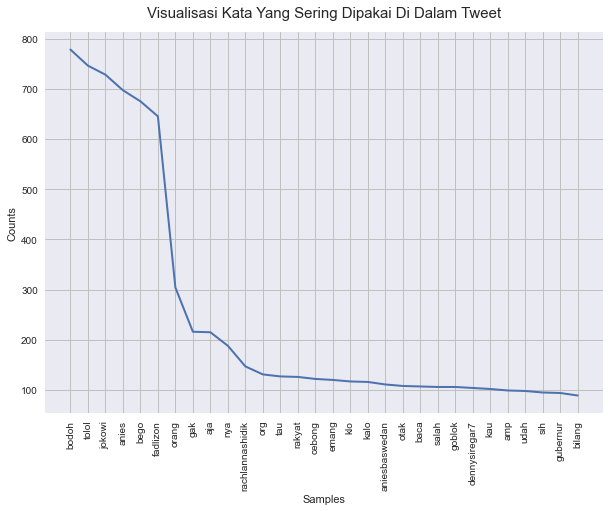

In [20]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["b"])))
fqdist_content.plot(30, cumulative=False)
plt.show()

## 4. Visualisasi Dengan Wordclouds 

### Semua Label (Positif & Negatif)

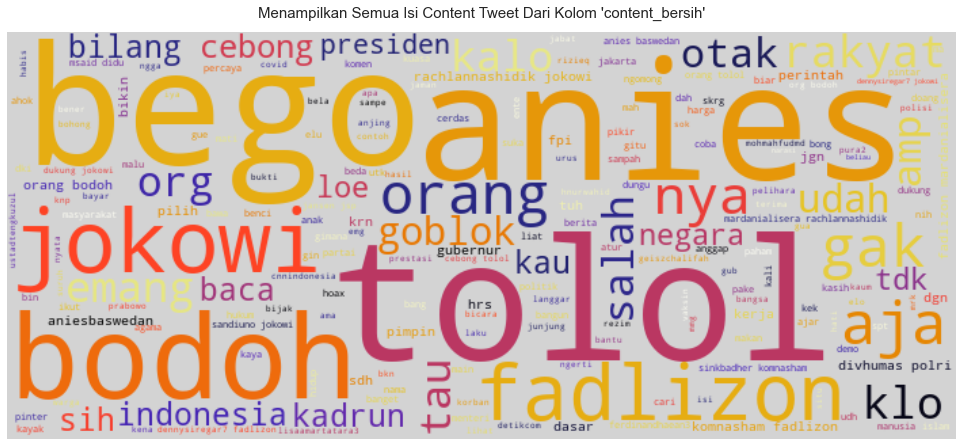

In [21]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_2020" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data_2020["content_bersih"])
wordcloud = WordCloud(colormap="CMRmap", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif

In [22]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_2020_label_positif = data_2020[data_2020.label == "positif"]
data_2020_label_positif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif,"[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...",biespartacus da yangqu aniesbaswedan owh kalo ...
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif,"[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...",perisyantik merryanjani19 cnnindonesia situ be...
6,2020-12-25 05:05:50+00:00,hasmisahar lisaamartatara3 aniesbaswedan coba...,positif,"[hasmisahar, lisaamartatara3, aniesbaswedan, c...","[hasmisahar, lisaamartatara3, aniesbaswedan, c...","[hasmisahar, lisaamartatara3, aniesbaswedan, c...",hasmisahar lisaamartatara3 aniesbaswedan coba ...
8,2020-12-24 14:08:33+00:00,ferdinandhaean3 skrg sedang jilat pemerintah ...,positif,"[ferdinandhaean3, skrg, sedang, jilat, pemerin...","[ferdinandhaean3, skrg, jilat, pemerintah, ber...","[ferdinandhaean3, skrg, jilat, perintah, harap...",ferdinandhaean3 skrg jilat perintah harap ngaj...
10,2020-12-22 06:11:46+00:00,pemerhatibangs4 selalubergerakk korupsi angga...,positif,"[pemerhatibangs4, selalubergerakk, korupsi, an...","[pemerhatibangs4, selalubergerakk, korupsi, an...","[pemerhatibangs4, selalubergerakk, korupsi, an...",pemerhatibangs4 selalubergerakk korupsi anggar...


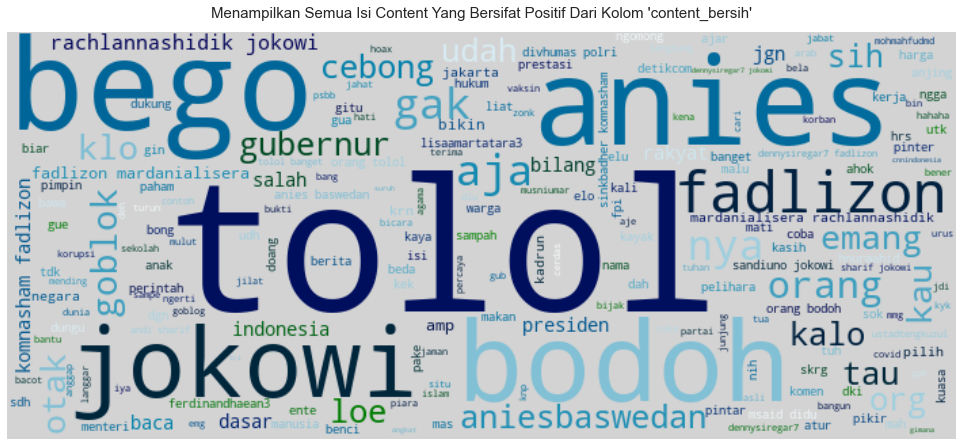

In [23]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_2020_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_2020_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="ocean", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [24]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_2020_label_negatif = data_2020[data_2020.label == "negatif"]
data_2020_label_negatif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif,"[beda, anies, dengan, pejabat, publik, lainnya...","[beda, anies, pejabat, publik, anies, kerja, b...","[beda, anies, jabat, publik, anies, kerja, ber...",beda anies jabat publik anies kerja berita jab...
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif,"[oposisicerdas, pokoknya, klo, pak, anies, cal...","[oposisicerdas, pokoknya, klo, anies, calon, p...","[oposisicerdas, pokok, klo, anies, calon, pres...",oposisicerdas pokok klo anies calon presiden o...
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif,"[detikcom, mnding, mikir, buat, 2022, dulu, ba...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...",detikcom mnding mikir 2022 bang 2022 aja blum ...
5,2020-12-26 22:53:17+00:00,doncorleone 78 yak bener kalo ngomong bego2i...,negatif,"[doncorleone, 78, yak, bener, kalo, ngomong, b...","[doncorleone, 78, yak, bener, kalo, ngomong, b...","[doncorleone, 78, yak, bener, kalo, ngomong, b...",doncorleone 78 yak bener kalo ngomong bego2in ...
7,2020-12-25 01:50:34+00:00,mw17714668 detikcom kalo anies kerja emg kudu...,negatif,"[mw17714668, detikcom, kalo, anies, kerja, emg...","[mw17714668, detikcom, kalo, anies, kerja, emg...","[mw17714668, detikcom, kalo, anies, kerja, emg...",mw17714668 detikcom kalo anies kerja emg kudu ...


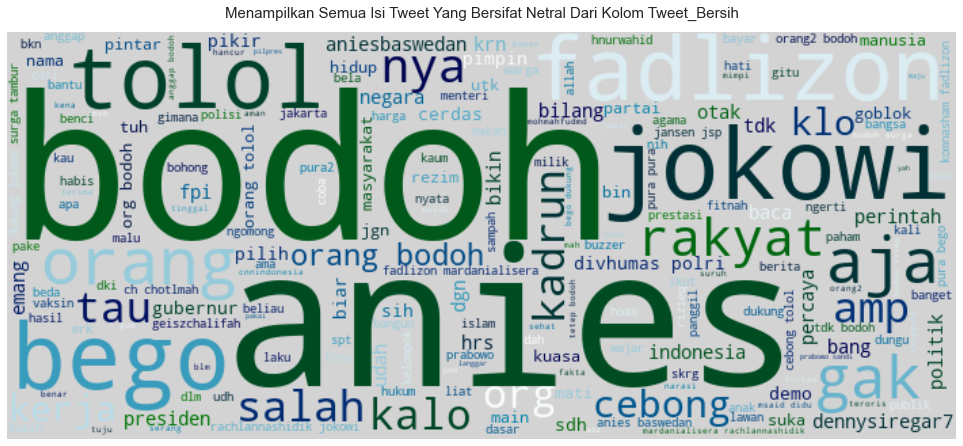

In [25]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_2020_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_2020_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="ocean", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan Dengan Model Machine Learning

In [26]:
# Menampilkan keseluruhan data dari DataFrame "data_2020"
data_2020.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2020-12-29 23:16:16+00:00,biespartacus da yangqu aniesbaswedan owh kalo...,positif,"[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...","[biespartacus, da, yangqu, aniesbaswedan, owh,...",biespartacus da yangqu aniesbaswedan owh kalo ...
1,2020-12-29 07:49:59+00:00,beda anies dengan pejabat publik lainnya pak a...,negatif,"[beda, anies, dengan, pejabat, publik, lainnya...","[beda, anies, pejabat, publik, anies, kerja, b...","[beda, anies, jabat, publik, anies, kerja, ber...",beda anies jabat publik anies kerja berita jab...
2,2020-12-28 14:52:49+00:00,perisyantik merryanjani19 cnnindonesia situ b...,positif,"[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...","[perisyantik, merryanjani19, cnnindonesia, sit...",perisyantik merryanjani19 cnnindonesia situ be...
3,2020-12-28 07:19:18+00:00,oposisicerdas pokoknya klo pak anies calon pr...,negatif,"[oposisicerdas, pokoknya, klo, pak, anies, cal...","[oposisicerdas, pokoknya, klo, anies, calon, p...","[oposisicerdas, pokok, klo, anies, calon, pres...",oposisicerdas pokok klo anies calon presiden o...
4,2020-12-27 16:42:18+00:00,detikcom mnding mikir buat 2022 dulu bang 202...,negatif,"[detikcom, mnding, mikir, buat, 2022, dulu, ba...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...","[detikcom, mnding, mikir, 2022, bang, 2022, aj...",detikcom mnding mikir 2022 bang 2022 aja blum ...


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [27]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_2020_tfidf = tfidf.fit_transform(data_2020["content_bersih"].astype("U"))
data_2020_tfidf

<1800x7294 sparse matrix of type '<class 'numpy.float64'>'
	with 29130 stored elements in Compressed Sparse Row format>

In [28]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_2020_tfidf, data_2020["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_2020_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data_2020: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas.

In [29]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [30]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data test supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [31]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("----------------------Prediksi Dari Data Latih---------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'positif' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'negatif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif'
 'negatif' 'negatif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positi

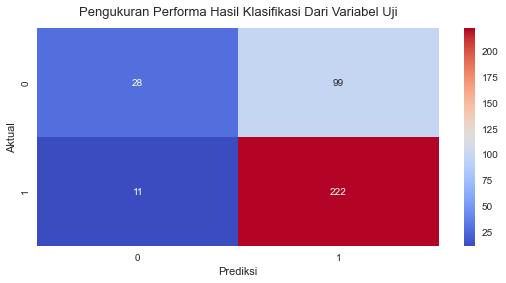

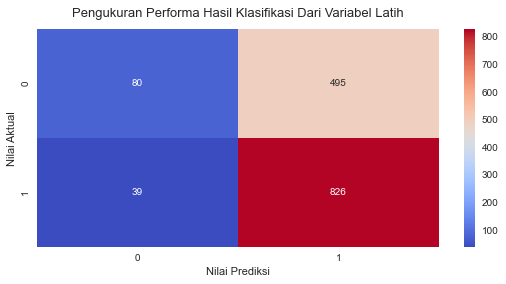

In [32]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="coolwarm", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="coolwarm", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 28. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 222. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 99. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 11. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 80. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 826. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 495. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 39. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [33]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.72      0.22      0.34       127
     positif       0.69      0.95      0.80       233

    accuracy                           0.69       360
   macro avg       0.70      0.59      0.57       360
weighted avg       0.70      0.69      0.64       360

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.67      0.14      0.23       575
     positif       0.63      0.95      0.76       865

    accuracy                           0.63      1440
   macro avg       0.65      0.55      0.49      1440
weighted avg       0.64      0.63      0.55      1440



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir

In [34]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data test
content_output_test_2020 = pd.DataFrame({"label": prediction_test})
content_output_test_2020.head()

,label
0,positif
1,positif
2,positif
3,negatif
4,negatif


In [35]:
# Membuat variabel yang dihasilkan dari prediksi label content sentimen terhadap data train
content_output_train_2020 = pd.DataFrame({"label": prediction_train})
content_output_train_2020.head()

,label
0,positif
1,positif
2,positif
3,positif
4,positif


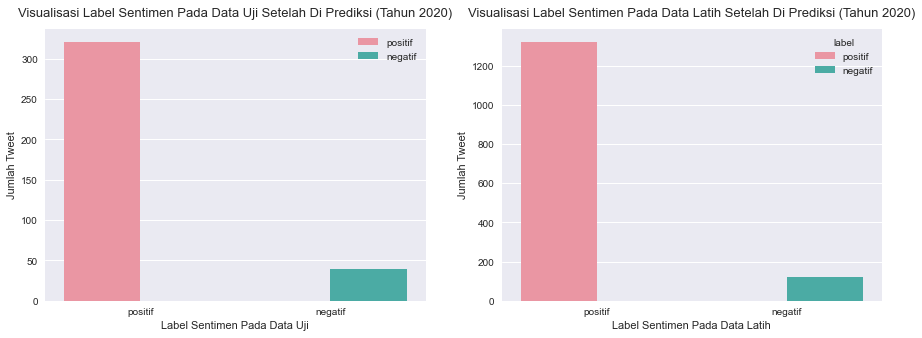

In [36]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test_2020)
plt.title("Visualisasi Label Sentimen Pada Data Uji Setelah Di Prediksi (Tahun 2020)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train_2020)
plt.title("Visualisasi Label Sentimen Pada Data Latih Setelah Di Prediksi (Tahun 2020)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()